#### Summary

This dataset contains anonymized data from patients seen at the Hospital Israelita Albert Einstein, at São Paulo, Brazil, and who had samples collected to perform the SARS-CoV-2 RT-PCR and additional laboratory tests during a visit to the hospital.All data were anonymized following the best international practices and recommendations. All clinical data were standardized to have a mean of zero and a unit standard deviation.

We are required to build model to predict:-

1. Whether the patients were tested positive for COVID-19?
2. Whether the patients were required admission in the hospital in general ward?
3. Whether the patients were required admission in the hospital in semi intensive care?
4. Whether the patients were required admission in the hospital in intensive care?

So we will have to build classification models to make predictions.

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import the dataset
df=pd.read_excel("project 20_covid19_clinical_dataset.xlsx")

In [3]:
pd.set_option('display.max_columns',None) # to display all columns
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
df.shape
#The dataset has 5644 rows and 11 columns

(5644, 111)

In [5]:
# checking the datatype of all columns
for i in df.columns:
    print("The datatype of the column -", i, "is ---", df[i].dtypes)

The datatype of the column - Patient ID is --- object
The datatype of the column - Patient age quantile is --- int64
The datatype of the column - SARS-Cov-2 exam result is --- object
The datatype of the column - Patient addmited to regular ward (1=yes, 0=no) is --- int64
The datatype of the column - Patient addmited to semi-intensive unit (1=yes, 0=no) is --- int64
The datatype of the column - Patient addmited to intensive care unit (1=yes, 0=no) is --- int64
The datatype of the column - Hematocrit is --- float64
The datatype of the column - Hemoglobin is --- float64
The datatype of the column - Platelets is --- float64
The datatype of the column - Mean platelet volume  is --- float64
The datatype of the column - Red blood Cells is --- float64
The datatype of the column - Lymphocytes is --- float64
The datatype of the column - Mean corpuscular hemoglobin concentration (MCHC) is --- float64
The datatype of the column - Leukocytes is --- float64
The datatype of the column - Basophils is 

In [6]:
# checking for missing values in each column
for i in df.columns:
    print("The missing values in the column -", i, "is --- ", df[i].isnull().sum())

The missing values in the column - Patient ID is ---  0
The missing values in the column - Patient age quantile is ---  0
The missing values in the column - SARS-Cov-2 exam result is ---  0
The missing values in the column - Patient addmited to regular ward (1=yes, 0=no) is ---  0
The missing values in the column - Patient addmited to semi-intensive unit (1=yes, 0=no) is ---  0
The missing values in the column - Patient addmited to intensive care unit (1=yes, 0=no) is ---  0
The missing values in the column - Hematocrit is ---  5041
The missing values in the column - Hemoglobin is ---  5041
The missing values in the column - Platelets is ---  5042
The missing values in the column - Mean platelet volume  is ---  5045
The missing values in the column - Red blood Cells is ---  5042
The missing values in the column - Lymphocytes is ---  5042
The missing values in the column - Mean corpuscular hemoglobin concentration (MCHC) is ---  5042
The missing values in the column - Leukocytes is --- 

Observations
There are many missing values in the dataset

In [7]:
# checking unique values in the dataset

pd.set_option('display.max_rows', 125)
col_name=[]
uni_name=[]
table=pd.DataFrame([])
for i in df.columns:
    col_name.append(str(i))
    uni_name.append(df[i].nunique())


table['columns']=col_name
table['No. of counts']=uni_name

table

,columns,No. of counts
0,Patient ID,5644
1,Patient age quantile,20
2,SARS-Cov-2 exam result,2
3,"Patient addmited to regular ward (1=yes, 0=no)",2
4,Patient addmited to semi-intensive unit (1=yes...,2
5,Patient addmited to intensive care unit (1=yes...,2
6,Hematocrit,176
7,Hemoglobin,84
8,Platelets,249
9,Mean platelet volume,48


In [8]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

33a0cbc84a23fee    1
f9014a2fb179b1b    1
2a3cfbaae1e9225    1
8583c9e1d0c0559    1
30cba6755335f02    1
                  ..
549bddb85e59747    1
019d680cfacd71b    1
892c576858dea6c    1
ed5c7655be41078    1
808cc838f7991f9    1
Name: Patient ID, Length: 5644, dtype: int64


11    380
4     366
9     359
0     334
7     319
2     315
13    313
14    299
5     294
6     281
16    279
19    275
15    269
17    263
18    259
3     251
1     234
12    197
10    190
8     167
Name: Patient age quantile, dtype: int64


negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64


0    5565
1      79
Name: Patient addmited to regular ward (1=yes, 0=no), dtype: int64


0    5594
1      50
Name: Patient addmited to semi-intensive unit (1=yes, 0=no), dtype: int64


0    5603
1      41
Name: Patient addmited to intensive care unit (1=yes, 0=no), dtype: int64


-0.473031    10
 0.190738     9
 0.694287     9
 0.556955     9
-0.495919     9
             ..
-1.045245     1
-3.3341

Name: Rhinovirus/Enterovirus, dtype: int64


Series([], Name: Mycoplasma pneumoniae, dtype: int64)


not_detected    1332
detected          20
Name: Coronavirus HKU1, dtype: int64


not_detected    1342
detected          10
Name: Parainfluenza 3, dtype: int64


not_detected    1343
detected           9
Name: Chlamydophila pneumoniae, dtype: int64


not_detected    1339
detected          13
Name: Adenovirus, dtype: int64


not_detected    1333
detected          19
Name: Parainfluenza 4, dtype: int64


not_detected    1343
detected           9
Name: Coronavirus229E, dtype: int64


not_detected    1344
detected           8
Name: CoronavirusOC43, dtype: int64


not_detected    1254
detected          98
Name: Inf A H1N1 2009, dtype: int64


not_detected    1350
detected           2
Name: Bordetella pertussis, dtype: int64


not_detected    1338
detected          14
Name: Metapneumovirus, dtype: int64


not_detected    1352
Name: Parainfluenza 2, dtype: int64


-0.209344    6
-0.438800    4


Series([], Name: Prothrombin time (PT), Activity, dtype: int64)


 0.530811    1
-1.400606    1
 0.869795    1
Name: Vitamin B12, dtype: int64


-0.240915    3
-0.251691    3
-0.472608    3
-0.111598    3
-0.208586    3
-0.284021    3
-0.386397    3
-0.402561    3
-0.515714    2
-0.289409    2
-0.434891    2
 0.055436    2
-0.327126    2
-0.429502    2
 0.039272    2
-0.359456    2
-0.127763    2
-0.165480    2
-0.197809    2
 0.217083    1
-0.391785    1
 0.033884    1
-0.477996    1
 0.082377    1
-0.461832    1
 0.308682    1
 0.233247    1
 0.173977    1
-0.510325    1
 0.157812    1
-0.154704    1
 0.437999    1
-0.176257    1
 0.125483    1
-0.149316    1
-0.418726    1
-0.057716    1
-0.262468    1
 2.442412    1
 1.547970    1
 0.324847    1
-0.445667    1
-0.375620    1
 0.540375    1
 0.734351    1
-0.407950    1
-0.219362    1
 0.136259    1
-0.025387    1
 5.810042    1
 0.244024    1
-0.413338    1
-0.138539    1
-0.300185    1
 0.023107    1
-0.343291    1
 0.087766    1


#### Observations
1. Patient ID is a column with unique values which can be removed.
2. Not all tests have been conducted to patients so we can see null values.
3. Many columns are been scaled ie. the mean is zero and values are expressed in the no. of standard deviation away from the mean.
4. Many columns are in categorical type like negative, positive etc. 
5. Columns like Mycoplasma pneumoniae, Porthrombin Time (PT), D-Dimer, Partial thromboplastin time (PTT), Urine Sugar are empty are needs to be removed from the dataset. Fio2 has only one value and can be removed. Other columns like Urine-cystals, urine - leukocytes etc are less in no. of values and can be removed.

##### Treating missing values

1. There are no single value present in few columns like 'Mycoplasma pneumoniae', 'Urine - Ketone Bodies', 'Urine - Sugar', 'Partial thromboplastin time (PTT)', 'Prothrombin time (PT), Activity' and 'D-Dimer'. And there is one value present in the column, 'Fio2 (venous blood gas analysis)'. And there are few values in the columns, 'Urine - Aspect', 'Urine - Leukocytes', 'Urine - Crystals', 'Urine - Color'. So these columns can be deleted.

2. In few columns, the data is already standardised with mean as zero and a unit standard deviation. Here, the missing values can be replaced with mean, that is zero.

3. In few columns, the data is categorical. We need to assign numerical values to them and also suitable numerical values to the missing values.

In [9]:
# Dropping the columns 
#'Fio2 (venous blood gas analysis)', 'Vitamin B12' have 1 and 3 values respectively
df1=df.drop(['Patient ID','Mycoplasma pneumoniae', 'Myeloblasts','Urine - Nitrite','Urine - Ketone Bodies','Urine - Sugar', 'Prothrombin time (PT), Activity','D-Dimer', 'Fio2 (venous blood gas analysis)', 'Vitamin B12','Partial thromboplastin time\xa0(PTT)\xa0','Urine - Aspect', 'Urine - Leukocytes', 'Urine - Crystals', 'Urine - Color'], axis=1)
df1.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Urine - Esterase,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_det

In [10]:
#These columns contain values like absent, normal, not done and present. We will replace them with suitable values
#.....and repalce missing values with -1
cols5=['Urine - Esterase', 'Urine - Hemoglobin', 'Urine - Bile pigments', 'Urine - Urobilinogen', 'Urine - Protein', 'Urine - Hyaline cylinders', 'Urine - Granular cylinders', 'Urine - Yeasts'] 
for i in cols5:
    df1[i]=df1[i].replace(['absent','normal','not_done','present'],[0,0,-1,1])
    df1[i]=df1[i].fillna(-1)
    print(df1[i].value_counts())

-1    5585
 0      59
Name: Urine - Esterase, dtype: int64
-1.0    5575
 0.0      53
 1.0      16
Name: Urine - Hemoglobin, dtype: int64
-1    5575
 0      69
Name: Urine - Bile pigments, dtype: int64
-1    5576
 0      68
Name: Urine - Urobilinogen, dtype: int64
-1    5585
 0      59
Name: Urine - Protein, dtype: int64
-1    5577
 0      67
Name: Urine - Hyaline cylinders, dtype: int64
-1    5575
 0      69
Name: Urine - Granular cylinders, dtype: int64
-1    5574
 0      70
Name: Urine - Yeasts, dtype: int64


In [11]:
# These columns contains values like negative, positive, not done etc. We will replace them with suitable values 
# .....and replace missing value with -1
cols4=['Influenza B, rapid test', 'Influenza A, rapid test' , 'Strepto A']
for i in cols4:
    df1[i]=df1[i].replace(['negative','positive','not_done'],[0,1,-1])
    df1[i]=df1[i].fillna(-1)

In [12]:
# replacing the null values in the columns with mean where the data are already standardised. 
#.....The mean value in a standardised data is zero, so we will be replacing those values with zero.


cols=['Hematocrit','Hemoglobin','Platelets', 'Red blood Cells', 'Lymphocytes', 'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils', 'Mean corpuscular volume (MCV)', 'Monocytes', 'Red blood cell distribution width (RDW)', 'Serum Glucose',  'Neutrophils',  'Urea', 'Proteina C reativa mg/dL', 'Creatinine', 'Total Bilirubin', 'Direct Bilirubin', 'Indirect Bilirubin', 'Potassium', 'Sodium', 'Rods #', 'Alanine transaminase', 'Aspartate transaminase', 'Alkaline phosphatase','Magnesium', 'pCO2 (venous blood gas analysis)', 'Hb saturation (venous blood gas analysis)', 'Base excess (venous blood gas analysis)', 'pO2 (venous blood gas analysis)',  'Total CO2 (venous blood gas analysis)', 'pH (venous blood gas analysis)', 'HCO3 (venous blood gas analysis)', 'Segmented', 'Promyelocytes', 'Metamyelocytes', 'Myelocytes', 'Urine - pH', 'Urine - Density', 'Urine - Red blood cells', 'Relationship (Patient/Normal)', 'International normalized ratio (INR)', 'Lactic Dehydrogenase', 'Ferritin', 'Arterial Lactic Acid', 'Lipase dosage', 'Albumin', 'Hb saturation (arterial blood gases)', 'pCO2 (arterial blood gas analysis)', 'Base excess (arterial blood gas analysis)', 'pH (arterial blood gas analysis)', 'Total CO2 (arterial blood gas analysis)', 'HCO3 (arterial blood gas analysis)', 'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor', 'ctO2 (arterial blood gas analysis)']
                                     
for i in cols:
      df1[i]=df1[i].fillna(0)

In [13]:
# columns here contains two values, not detected and detected, these are replaced with 0 and 1
cols1=['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B', 'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus', 'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43', 'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus', 'Parainfluenza 2']

for i in cols1:
    df1[i]=df1[i].replace(['not_detected','detected'],[0,1])


In [14]:
# After replacing values, the null values are filled by -1
cols1=['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B', 'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus', 'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43', 'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus', 'Parainfluenza 2']

for i in cols1:
    df1[i]=df1[i].fillna(-1)
    print(df1[i].value_counts())

-1.0    4290
 0.0    1302
 1.0      52
Name: Respiratory Syncytial Virus, dtype: int64
-1.0    4290
 0.0    1336
 1.0      18
Name: Influenza A, dtype: int64
-1.0    4290
 0.0    1277
 1.0      77
Name: Influenza B, dtype: int64
-1.0    4292
 0.0    1349
 1.0       3
Name: Parainfluenza 1, dtype: int64
-1.0    4292
 0.0    1307
 1.0      45
Name: CoronavirusNL63, dtype: int64
-1.0    4292
 0.0     973
 1.0     379
Name: Rhinovirus/Enterovirus, dtype: int64
-1.0    4292
 0.0    1332
 1.0      20
Name: Coronavirus HKU1, dtype: int64
-1.0    4292
 0.0    1342
 1.0      10
Name: Parainfluenza 3, dtype: int64
-1.0    4292
 0.0    1343
 1.0       9
Name: Chlamydophila pneumoniae, dtype: int64
-1.0    4292
 0.0    1339
 1.0      13
Name: Adenovirus, dtype: int64
-1.0    4292
 0.0    1333
 1.0      19
Name: Parainfluenza 4, dtype: int64
-1.0    4292
 0.0    1343
 1.0       9
Name: Coronavirus229E, dtype: int64
-1.0    4292
 0.0    1344
 1.0       8
Name: CoronavirusOC43, dtype: int64
-1.0    4

In [15]:
# replacing the null values in the other columns with mean where the data are already standardised. 
#.....The mean value in a standardised data is zero, so we will be replacing those values with zero.

cols8=['Mean platelet volume ','Mean corpuscular hemoglobin concentration\xa0(MCHC)', 'Gamma-glutamyltransferase\xa0',  'Ionized calcium\xa0', 'Creatine phosphokinase\xa0(CPK)\xa0']
for i in cols8:
    df1[i]=df1[i].fillna(0)
    print(df1[i].value_counts())

 0.000000    5045
-0.550290      36
 0.010677      30
-0.438097      27
-0.774677      27
-0.213711      27
-0.325903      26
 0.683835      25
 0.796029      25
-0.662483      24
-1.111256      23
 0.235063      23
 0.459449      23
-0.101517      22
-0.999063      21
-1.223449      19
 0.908221      18
 0.122869      18
 0.347255      17
 1.020415      14
 1.132609      14
 0.571643      13
-1.335643      11
-1.560029      11
-0.886869       9
 1.693575       9
 1.244801       8
-1.447836       8
 1.469188       7
 1.581381       7
-1.672222       6
-1.896609       6
 1.356995       6
 1.917961       6
 2.254541       5
 2.030154       4
 1.805767       4
 2.703313       4
-1.784415       3
 2.142347       3
 2.366734       2
-2.120995       1
-2.008802       1
 3.713052       1
-2.457575       1
 2.478927       1
 2.927700       1
-2.345381       1
 2.591120       1
Name: Mean platelet volume , dtype: int64
 0.000000    5042
-0.154166      31
 0.343725      30
-0.054585      28
-0.2

In [16]:
# replacing a categorical variable with a numerical value 9. There is only one categorical value in this column.
df1['Urine - pH']=df1['Urine - pH'].replace('Não Realizado','9')

In [17]:
# Need to change the datatype of Urine - pH  
df1['Urine - pH']=df1['Urine - pH'].astype(float)

In [18]:
# If we observe the values in the column 'Urine = pH' properly, we can know that the data is not scaled. Hence we need to scale it.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df1['Urine - pH']=pd.DataFrame(scaler.fit_transform(pd.DataFrame(df1['Urine - pH'])))

In [19]:
df1.isnull().sum()
# There are no null values in the dataset. All the null values have been replaced with appropriate values.

Patient age quantile                                     0
SARS-Cov-2 exam result                                   0
Patient addmited to regular ward (1=yes, 0=no)           0
Patient addmited to semi-intensive unit (1=yes, 0=no)    0
Patient addmited to intensive care unit (1=yes, 0=no)    0
Hematocrit                                               0
Hemoglobin                                               0
Platelets                                                0
Mean platelet volume                                     0
Red blood Cells                                          0
Lymphocytes                                              0
Mean corpuscular hemoglobin concentration (MCHC)         0
Leukocytes                                               0
Basophils                                                0
Mean corpuscular hemoglobin (MCH)                        0
Eosinophils                                              0
Mean corpuscular volume (MCV)                           

In [20]:
#checking how many patients have been tested positive and negative
df1['SARS-Cov-2 exam result'].value_counts()
#5086 patients have been tested positive and 558 patients have been tested negative.

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64

In [21]:
# The 'SARS-Cov-2 exam result' column values needs to be replaced with 0 and 1 to fit into the model later.
df1['SARS-Cov-2 exam result']=df1['SARS-Cov-2 exam result'].replace(['negative','positive'],[0,1])
df1['SARS-Cov-2 exam result'].value_counts() 
# The values are replaced successfully

0    5086
1     558
Name: SARS-Cov-2 exam result, dtype: int64

In [22]:
df1.head()
# we need to scale Patient age quantile separately as other columns are already been scaled.

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Urine - Esterase,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,13,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,-0.110728,-1.0,-1,0.0,-1,-1,0.0,-1,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17,0,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,-0.110728,-1.0,-1,0.0,-1,-1,0.0,-1,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,-0.110728,-1.0,-1,0.0,-1,-1,0.0,-1,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,-0.110728,-1.0,-1,0.0,-1,-1,0.0,-1,-1,-1,0.0,0.0,0.0,0.0,

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df1['Patient age quantile']=pd.DataFrame(scaler.fit_transform(pd.DataFrame(df1['Patient age quantile'])))
df1['Patient age quantile'].head()

0    0.637244
1    1.329598
2   -0.228198
3   -0.747464
4    0.983421
Name: Patient age quantile, dtype: float64

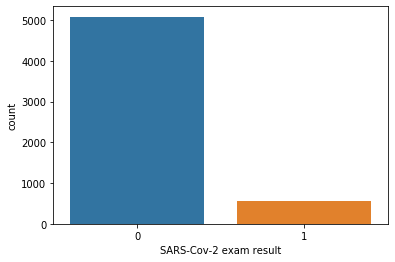

In [24]:
sns.countplot(df1['SARS-Cov-2 exam result'])

In [25]:
df1['Patient age quantile'].value_counts()
# The values in the column have been scaled 

 0.291067    380
-0.920552    366
-0.055110    359
-1.612906    334
-0.401287    319
-1.266729    315
 0.637244    313
 0.810333    299
-0.747464    294
-0.574375    281
 1.156510    279
 1.675775    275
 0.983421    269
 1.329598    263
 1.502687    259
-1.093641    251
-1.439818    234
 0.464156    197
 0.117979    190
-0.228198    167
Name: Patient age quantile, dtype: int64

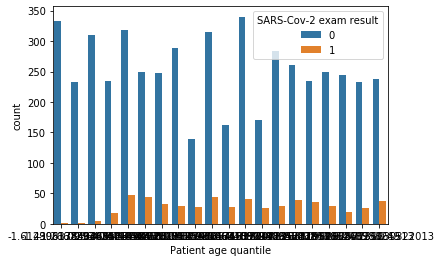

In [26]:
sns.countplot(df1['Patient age quantile'], hue=df1['SARS-Cov-2 exam result'])

Observation
1. We can observe that the no. of positive cases across the patient age quantile is similar. Only for the patient age quantile 3, 2, 1 and 0 it is low.

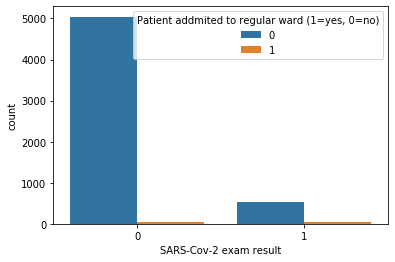

In [27]:
sns.countplot(df1['SARS-Cov-2 exam result'], hue=df1['Patient addmited to regular ward (1=yes, 0=no)'])

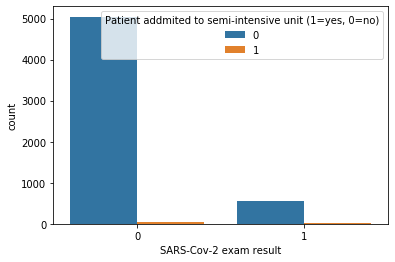

In [28]:
sns.countplot(df1['SARS-Cov-2 exam result'], hue=df1['Patient addmited to semi-intensive unit (1=yes, 0=no)'])

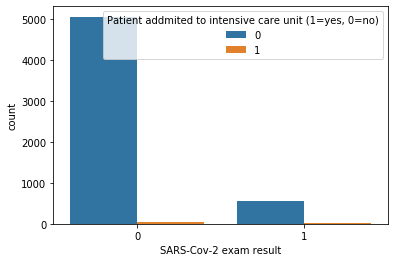

In [29]:
sns.countplot(df1['SARS-Cov-2 exam result'], hue=df1['Patient addmited to intensive care unit (1=yes, 0=no)'])

##### Observations
The graphs are not able to give proper information, we can analyse them by using groupby function

In [30]:
df1.groupby(df1['SARS-Cov-2 exam result']).mean()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Urine - Esterase,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
SARS-Cov-2 exam result,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.024923,0.0,0.008455,0.008258,0.006488,-0.004049,-0.004280,0.011519,-0.004383,-0.004951,0.000622,-0.001870,0.011773,0.002571,0.001162,0.007860,0.002254,-0.008045,0.001626,0.000281,-0.745576,-0.752261,-0.741250,-0.755604,-0.747936,-0.682855,-0.752261,-0.754227,-0.754424,-0.753637,-0.752458,-0.754621,-0.754621,-0.736925,-0.755800,-0.753441,-0.756193,0.001353,0.001922,-0.002472,-0.002406,0.002321,0.002459,-0.841722,-0.840739,-0.001921,-0.002568,-0.001579,0.001857,0.001057,0.002095,0.000717,0.000975,-0.930987,0.000227,0.000074,-0.000050,-0.000974,-0.000025,-0.000518,-0.000837,-0.000581,-0.000702,-0.001032,0.000181,0.000559,0.000413,-0.990562,-0.008063,-0.985843,-0.988793,0.000938,-0.988989,-0.990366,0.000335,-0.988989,-0.988793,-0.988596,-0.000305,0.000395,-0.000951,0.000431,-0.000230,0.000321,-0.000146,-1.464920e-11,-0.000348,0.000859,-0.000346,-0.000835,0.000662,0.000567,-0.000829,0.000608,0.000105,-0.000709
1,0.227167,1.0,0.064516,0.014337,0.014337,0.036903,0.039009,-0.104991,0.039953,0.045125,-0.005668,0.017043,-0.107311,-0.023431,-0.010593,-0.071642,-0.020544,0.073328,-0.014824,-0.002565,-0.799283,-0.799283,-0.793907,-0.799283,-0.793907,-0.788530,-0.799283,-0.799283,-0.799283,-0.799283,-0.799283,-0.797491,-0.799283,-0.799283,-0.799283,-0.799283,-0.799283,-0.012335,-0.017522,0.022533,0.021928,-0.021154,-0.022413,-0.885305,-0.888889,0.017509,0.023405,0.014388,-0.016927,-0.009637,-0.019093,-0.006538,-0.008884,-0.974910,-0.002073,-0.000673,0.000459,0.008881,0.000225,0.004721,0.007630,0.005298,0.006400,0.009407,-0.001646,-0.005096,-0.003760,-0.980287,0.073488,-0.976703,-0.978495,-0.008552,-0.978495,-0.982079,-0.003051,-0.980287,-0.978495,-0.978495,0.002783,-0.003597,0.008670,-0.003924,0.002101,-0.002929,0.001332,0.000000e+00,0.003172,-0.007833,0.003155,0.00

##### Observations
1. The average age quantile of positive cases is more than negative.
2. The chances of getting admitted to hospital, regular ward, semi intensive unit and intensive care unit is higher for all positive cases.
3. The average hemotocrit, hemoglobin are less in corona negative patients.
4. The average platelets is high in corona negative patients.
5. These values are less in corona positive patients when compared to corona negative patients.
a. Platelets, Lymphocytes, Leukocytes, Mean corpuscular hemoglobin, Eosinophils, Serum Glucose, average red blood cells and mean platelets volume etc


In [31]:
df1.describe()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Urine - Esterase,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
count,5.644000e+03,5644.000000,5644.000000,5644.000000,5644.000000,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5644.000000,5644.000000,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5644.00000,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5644.000000,5.644000e+03,5644.000000,5644.000000,5.644000e+03,5644.000000,5644.000000,5.644000e+03,5644.000000,5644.000000,5644.000000,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03
mean,-3.855094e-15,0.098866,0.013997,0.008859,0.007264,-2.335732e-10,-1.710835e-09,-3.770503e-11,7.894130e-10,8.985679e-10,-8.390814e-10,1.082473e-10,6.629928e-10,-7.075675e-10,-3.683047e-10,7.686216e-10,-4.432198e-10,-3.428930e-10,1.088413e-09,2.605525e-10,-0.750886,-0.756910,-0.746456,-0.759922,-0.752481,-0.693303,-0.756910,-0.758682,-0.758859,-0.758150,-0.757087,-0.758859,-0.759036,-0.743090,-0.760099,-0.757973,-0.760454,5.370286e-10,-4.695390e-10,2.492080e-10,-5.017987e-10,1.339890e-09,7.366095e-10,-0.846031,-0.845500,1.084123e-10,-2.178146e-11,-4.009769e-11,-8.976603e-11,3.887661e-10,9.768656e-11,-5.197849e-11,1.689714e-10,-0.93533,-3.696248e-11,-4.663213e-10,3.636844e-10

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000294C1538488>,
      dtype=object)

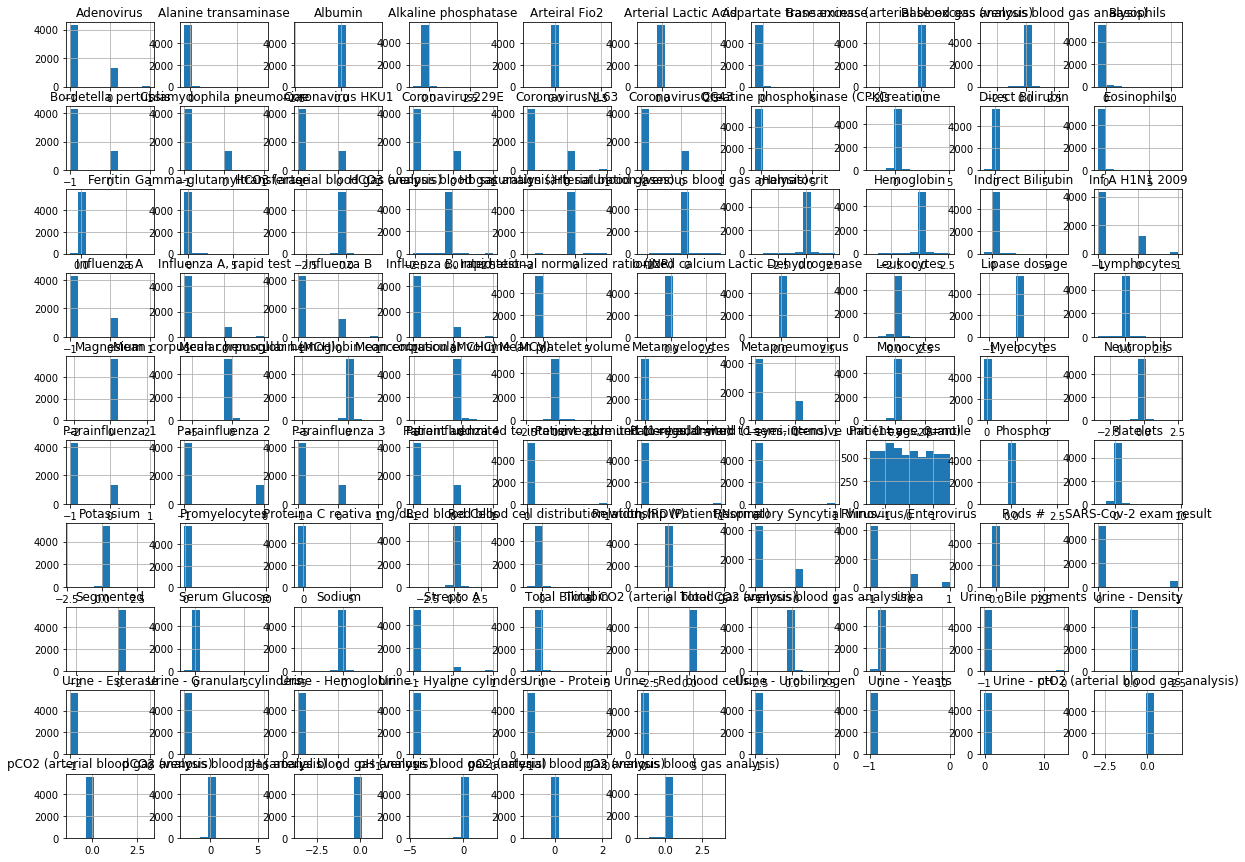

In [32]:
df1.hist(figsize=(20,15))
# Many columns are not distributed well

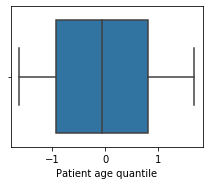

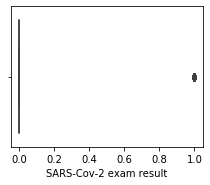

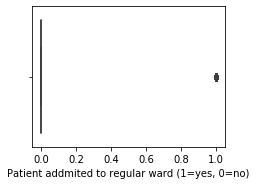

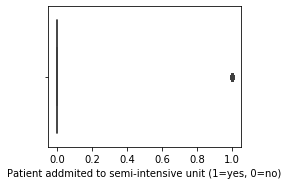

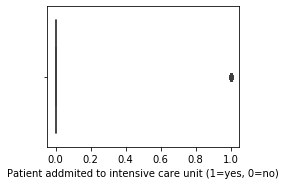

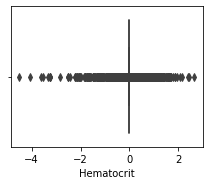

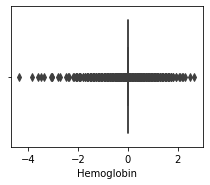

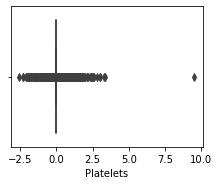

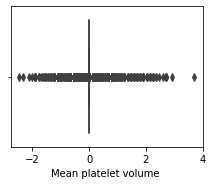

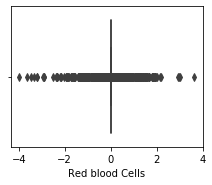

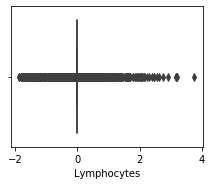

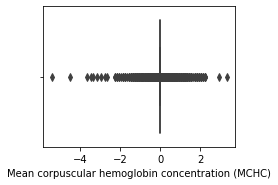

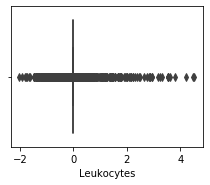

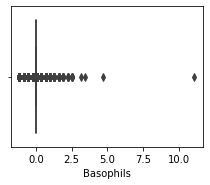

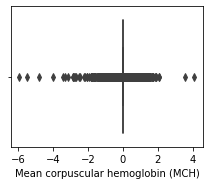

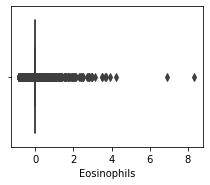

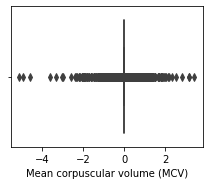

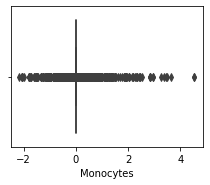

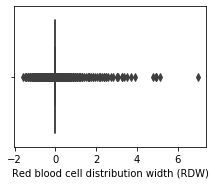

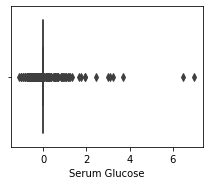

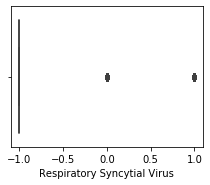

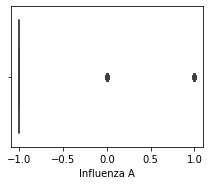

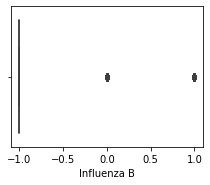

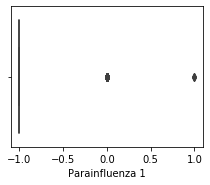

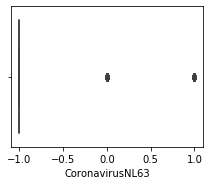

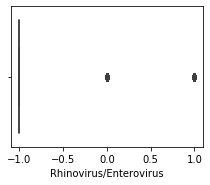

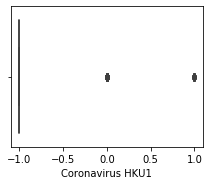

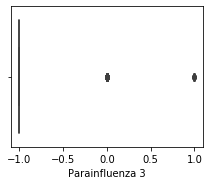

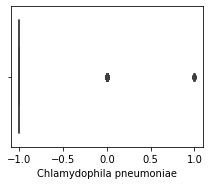

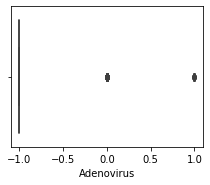

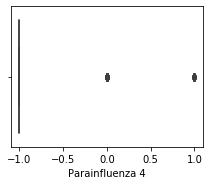

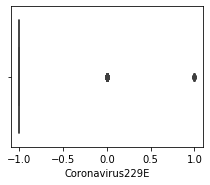

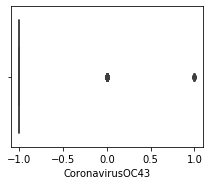

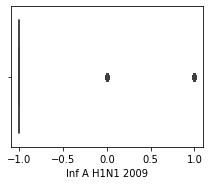

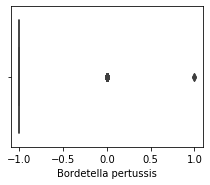

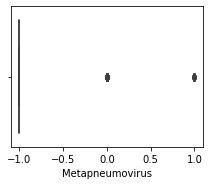

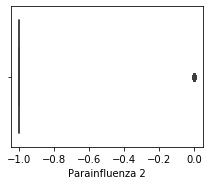

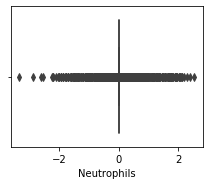

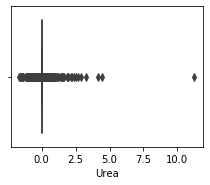

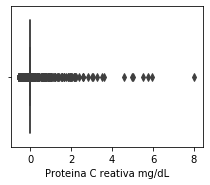

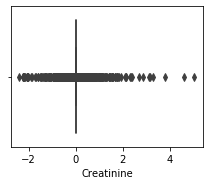

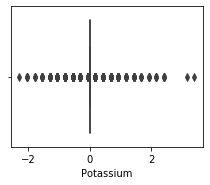

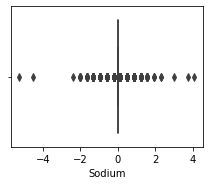

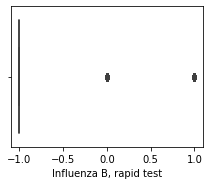

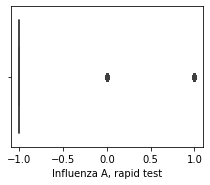

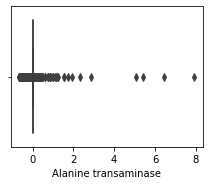

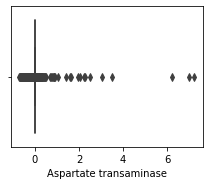

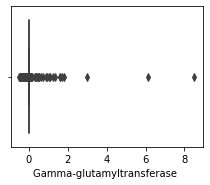

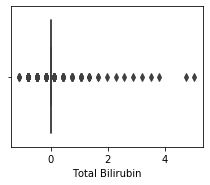

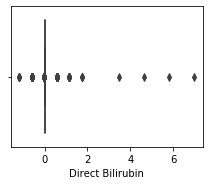

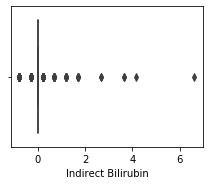

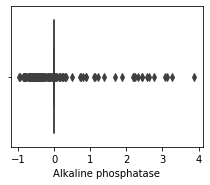

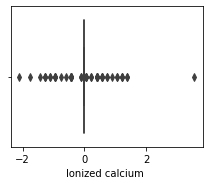

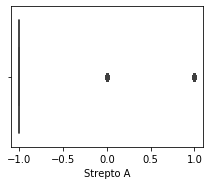

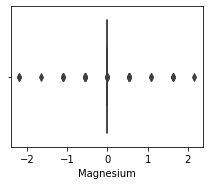

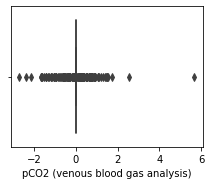

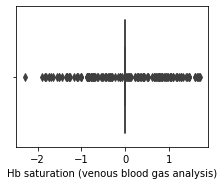

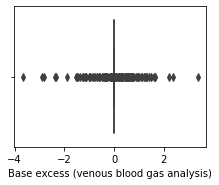

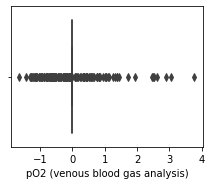

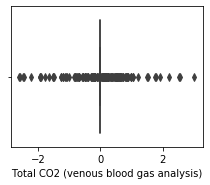

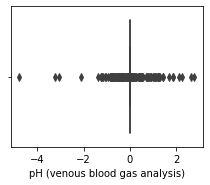

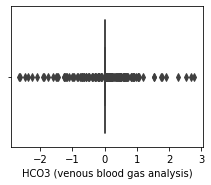

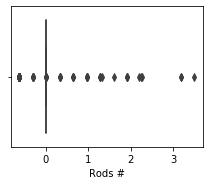

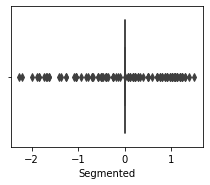

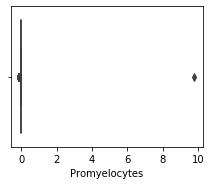

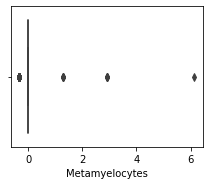

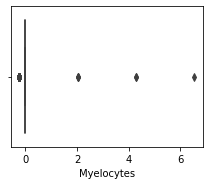

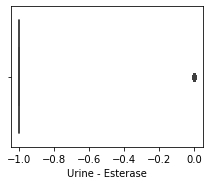

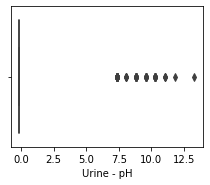

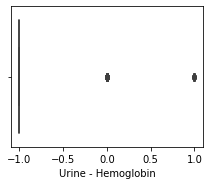

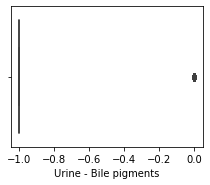

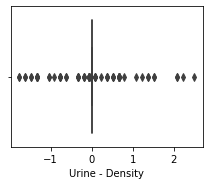

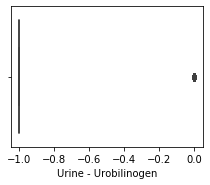

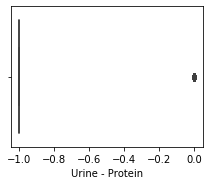

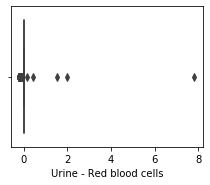

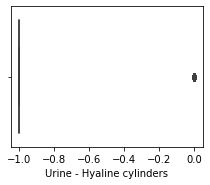

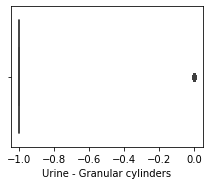

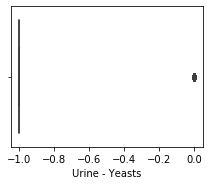

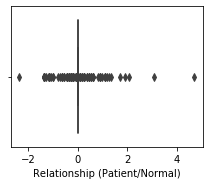

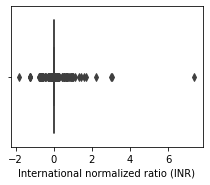

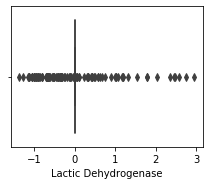

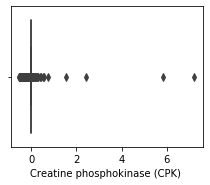

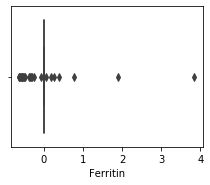

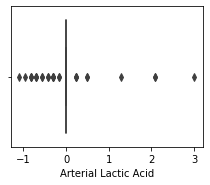

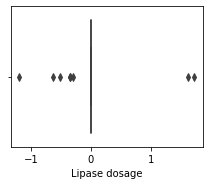

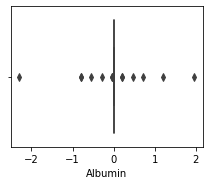

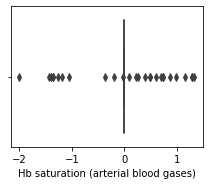

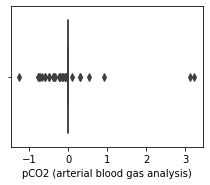

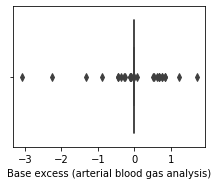

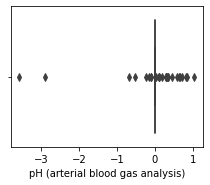

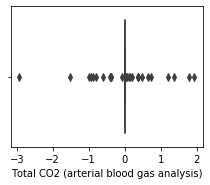

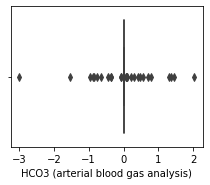

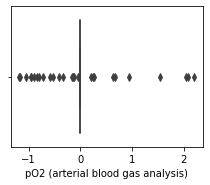

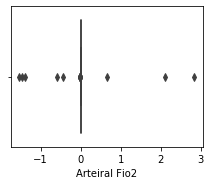

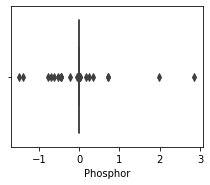

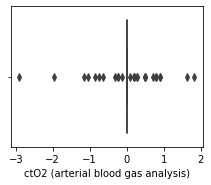

In [33]:
for i in df1.columns:
    if df1[i].dtypes!='O':
        plt.figure(figsize=(20,15))
        plt.subplot(5,5,5)
        sns.boxplot(df1[i])
#There are many outliers in the data

In [34]:
# There are many outliers in the columns

#### Checking correlation

In [35]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',125)
df1.corr()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Urine - Esterase,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
Patient age quantile,1.000000,7.524442e-02,4.616576e-02,1.573586e-02,-3.577158e-02,0.031292,0.019498,-0.051183,0.038392,-0.012099,-0.040620,-0.040213,-0.053667,0.034682,0.063669,0.007124,0.090847,0.016385,0.053681,0.038632,-0.042937,-0.018263,-0.031806,-0.016496,-0.014172,-0.036245,-0.014020,-0.014883,-0.016726,-0.024588,-0.023355,-0.016797,-0.017293,-0.026578,-0.017999,-0.019565,-0.017278,0.024183,0.087847,0.026245,0.098785,0.000476,-0.001231,-0.130636,-0.133817,0.026923,0.008113,0.040960,0.027392,0.050402,0.001514,-0.083812,-0.037983,-0.152266,-0.012330,0.036681,-0.010471,0.097924,-0.012574,0.088728,0.045224,0.090102,0.007478,0.045603,0.020867,0.028753,0.014337,0.007905,0.011213,0.016478,0.012009,-1.519122e-02,0.012466,0.003080,2.048943e-02,0.011232,0.011172,1.377534e-02,-0.018227,0.002446,-0.022409,-0.015002,2.721363e-02,7.063568e-03,-1.215658e-02,-7.563036e-03,-1.628616e-02,-3.411040e-02,4.148422e-02,4.150677e-02,6.263816e-03,1.208974e-02,-7.157476e-03,-2.123879e-02,-4.135060e-02,-4.455310e-03
SARS-Cov-2 exam result,0.075244,1.000000e+00,1.424375e-01,1.936368e-02,2.758612e-02,0.037396,0.039530,-0.106482,0.040622,0.045766,-0.005749,0.017285,-0.108835,-0.023763,-0.010744,-0.072659,-0.020835,0.074431,-0.015035,-0.004426,-0.035364,-0.032167,-0.033775,-0.030435,-0.030515,-0.053551,-0.032108,-0.031130,-0.031031,-0.031425,-0.032011,-0.029656,-0.030933,-0.039184,-0.030335,-0.031523,-0.030134,-0.013552,-0.021883,0.024927,0.026500,-0.027329,-0.028995,-0.033857,-0.037225,0.029047,0.038741,0.028945,-0.031222,-0.017776,-0.035217,-0.013557,-0.031266,-0.048678,-0.008157,-0.001436,0.000980,0.018950,0.000481,0.010074,0.016281,0.011304,0.016171,0.023767,-0.004159,-0.012876,-0.009500,0.030156,0.024341,0.019055,0.027972,-2.543432e-02,0.028712,0.024320,-9.072978e-03,0.023984,0.027972,2.724329e-02,0.007260,-0.007760,0.021468,-0.009575,1.089999e-02,-1.402490e-02,1.172085e-02,9.110727e-11,1.51

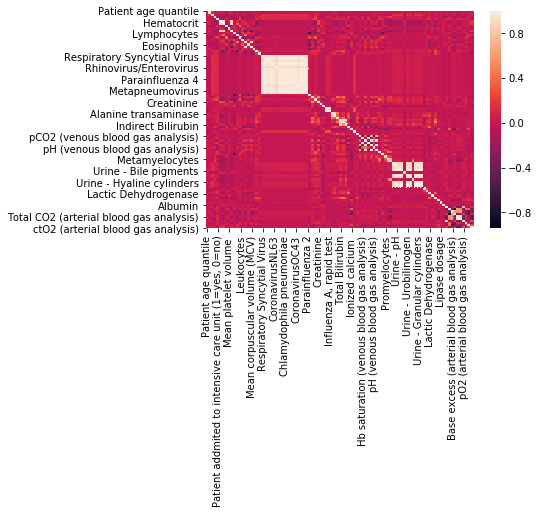

In [36]:
sns.heatmap(df1.corr())

Observations
1. Respiratory Syncytial Virus, Rhinovirus/Enterovirus, Parainfluenza 4, Metapneumovirus, CoronavirusOC43, Parainfluenza 2, CoronavirusOC63 are positively correlated to each other.
2. Urine Esterase, urine density, urine hyaline cylinders, international normalised ratio , urine bile pigments, urine red blood cells are positively correlated to each other.

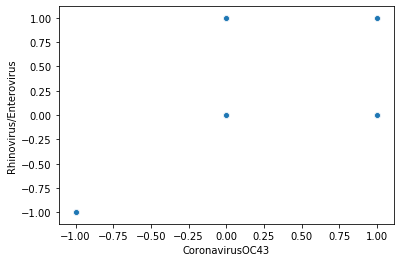

In [37]:
#scatterplot
sns.scatterplot(x='CoronavirusOC43',y='Rhinovirus/Enterovirus',data=df1)
# These show a linear relationship to some extent

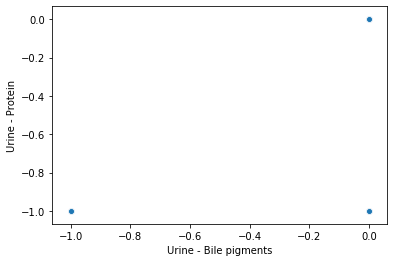

In [38]:
sns.scatterplot(x='Urine - Bile pigments',y='Urine - Protein',data=df1)
# These show linear relationship, but more data is required to confirm it

#### Removing outliers

In [39]:
#checking for outliers
from scipy.stats import zscore
z=zscore(df1)
print("The shape before the outliers are removed", df1.shape)
df2=df1[(z<3).all(axis=1)]
print("The shape after the outliers are removed", df2.shape)

The shape before the outliers are removed (5644, 96)
The shape after the outliers are removed (4031, 96)


In [40]:
# Lets check the value counts of the target column 'SARS-Cov-2 exam result' after removing the outliers
df2['SARS-Cov-2 exam result'].value_counts()
# we can observe that removing the outliers, the class of 'positive' or '1' values have been deleted. So to develop model, 
#....we have to use the dataset without removing outliers

0    4031
Name: SARS-Cov-2 exam result, dtype: int64

In [41]:
df1.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Urine - Esterase,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,0.637244,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,-0.110728,-1.0,-1,0.0,-1,-1,0.0,-1,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.329598,0,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,-0.110728,-1.0,-1,0.0,-1,-1,0.0,-1,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.228198,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,-0.110728,-1.0,-1,0.0,-1,-1,0.0,-1,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.747464,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,-0.110728,-1.0,-1,0.0,-1,-1,0

In [42]:
# Separating four target variables from the data. 
# The first target is SARS-Cov-2 exam result whether positive or negative. 
# The second target is whether person admitted to regular ward or not 
# the third target is whether person admitted to semi-intensive unit
# the fourth target is whether person admitted to intensive care unit
y=pd.DataFrame(df1['SARS-Cov-2 exam result'])
y1=pd.DataFrame(df1['Patient addmited to regular ward (1=yes, 0=no)'])
y2=pd.DataFrame(df1['Patient addmited to semi-intensive unit (1=yes, 0=no)'])
y3=pd.DataFrame(df1['Patient addmited to intensive care unit (1=yes, 0=no)'])
x=df1.drop(['Patient addmited to regular ward (1=yes, 0=no)','Patient addmited to semi-intensive unit (1=yes, 0=no)','Patient addmited to intensive care unit (1=yes, 0=no)'],axis=1)

### PCA-Principle Component Analysis
to reduce the number of columns

In [43]:
from sklearn.decomposition import PCA
pca=PCA(n_components=30)
x=pca.fit_transform(x)
x.shape

(5644, 30)

In [44]:
x=pd.DataFrame(data=x)
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,-1.045943,0.047245,-0.629949,0.036295,-0.096990,0.081676,-0.009755,-0.044261,-0.012343,-0.003215,0.013222,0.012874,-0.008054,-0.109929,0.027268,-0.003430,0.039013,0.021339,0.006913,-0.002729,-0.001673,0.002226,-0.005412,0.002963,-0.001513,0.000702,-0.000236,-0.002576,-0.000177,-0.000333
1,3.366830,-0.063288,-1.411565,-0.623297,0.641577,-0.898751,0.806267,1.140382,1.400180,-0.219169,-0.053008,-0.404178,0.723396,-0.104672,-1.465143,-0.037788,0.670785,0.937418,-0.102451,-0.495998,-0.001643,0.478949,0.136952,0.568213,-1.190251,-0.017994,-0.610218,0.125566,-0.263488,-0.032589
2,-1.029635,-0.098955,0.213185,0.010069,-0.180014,0.096304,-0.071099,0.009245,-0.005362,0.014584,-0.002832,0.019491,-0.004674,-0.087922,0.021131,0.002900,0.039295,0.025677,0.008356,-0.024744,-0.003188,-0.000358,0.000713,-0.003989,0.005185,-0.001191,0.000203,-0.001739,0.001361,-0.002055
3,-1.019850,-0.186676,0.719066,-0.005667,-0.229829,0.105082,-0.107906,0.041349,-0.001174,0.025264,-0.012464,0.023461,-0.002645,-0.074718,0.017448,0.006699,0.039464,0.028280,0.009221,-0.037953,-0.004098,-0.001909,0.004388,-0.008160,0.009204,-0.002328,0.000467,-0.001238,0.002283,-0.003088
4,3.352902,-0.127784,-1.104243,-0.019550,-0.185772,0.123260,-0.021412,-0.103074,0.039983,-0.009898,0.054929,0.020049,-0.024404,-0.120328,0.020627,0.046142,0.007647,-0.019205,-0.070216,-0.079599,-0.096228,0.019046,-0.040009,0.643040,-0.157581,-0.116567,0.029634,0.040256,0.073212,-0.024129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,-1.019215,-0.233265,1.033192,-0.053241,-0.259467,0.127417,-0.142643,0.130115,-0.177415,-0.017318,-0.175859,-0.057122,0.047802,0.756794,-0.269968,-0.025335,-0.287447,-0.167558,-0.071780,0.028159,0.006988,0.009696,0.007137,0.023040,-0.019963,0.006929,-0.016492,0.030359,-0.006312,0.024901
5640,-1.058990,0.164206,-1.304456,0.057276,-0.030570,0.069973,0.039320,-0.087066,-0.017928,-0.017455,0.026065,0.007580,-0.010758,-0.127534,0.032177,-0.008495,0.038787,0.017869,0.005759,0.014883,-0.000460,0.004294,-0.010312,0.008525,-0.006872,0.002217,-0.000587,-0.003245,-0.001407,0.001044
5641,-1.016589,-0.215916,0.887692,-0.010912,-0.246433,0.108008,-0.120175,0.052050,0.000222,0.028824,-0.015675,0.024785,-0.001969,-0.070317,0.016221,0.007965,0.039521,0.029147,0.009510,-0.042356,-0.004401,-0.002426,0.005613,-0.009551,0.010544,-0.002706,0.000554,-0.001070,0.002590,-0.003433
5642,-0.599724,7.638231,1.192664,-0.679496,-0.195010,0.261702,0.080173,-0.345206,-0.004572,0.342170,-0.024097,0.108294,0.052895,-0.157774,-0.075051,0.059321,0.150366,-0.105419,0.101624,0.022769,-0.039453,0.035118,-0.092082,-0.040947,0.043154,0.033394,-0.057928,-0.027689,0.093864,0.086225


### Model for predicting the first target - SARS-Cov-2 result

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [46]:
# determining the best random state for the model
def max_acc_score(reg,x,y):
    max_score=0
    for r_state in range (42,101):
        train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.20)
        reg.fit(train_x,train_y)
        pred=reg.predict(test_x)
        acc_score=accuracy_score(test_y,pred)
        if acc_score>max_score:
            max_score=acc_score
            final_r_state=r_state
    print("The maximum accuracy score", max_score, "is achieved at", final_r_state)
    return max_score

In [47]:
lg=LogisticRegression()
max_acc_score(lg,x,y)

The maximum accuracy score 1.0 is achieved at 42


1.0

In [48]:
#Lets finalise the train and test data
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=42,test_size=0.20)

In [49]:
#Let us check the different models and we need to use GradientSearchCV to bring out the best parameters for the models

#### Using GridSearchCV

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
parameters={'n_neighbors':(5,10,15,20),'weights':('uniform','distance'),'algorithm':('auto','ball_tree','kd_tree','brute')}
gdkn=GridSearchCV(kn,parameters)
gdkn.fit(train_x,train_y)
gdkn.best_params_

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}

In [51]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy'), 'splitter':('best','random')}
gddt=GridSearchCV(dt,parameters)
gddt.fit(train_x,train_y)
gddt.best_params_

{'criterion': 'gini', 'splitter': 'best'}

In [52]:
from sklearn.svm import SVC
sv=SVC()
parameters={'C':(1,10),'kernel':('linear','poly','rbf')}
gdsv=GridSearchCV(sv,parameters)
gdsv.fit(train_x,train_y)
gdsv.best_params_

{'C': 1, 'kernel': 'linear'}

In [53]:
#After obtaining best parameters, we should now check the models

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
The accuracy score is  1.0
The cross val score is 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1021
           1       1.00      1.00      1.00       108

    accuracy                           1.00      1129
   macro avg       1.00      1.00      1.00      1129
weighted avg       1.00      1.00      1.00      1129


[[1021    0]
 [   0  108]]

roc_auc_score 1.0


AxesSubplot(0.125,0.808774;0.62x0.0712264)




KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')
The accur

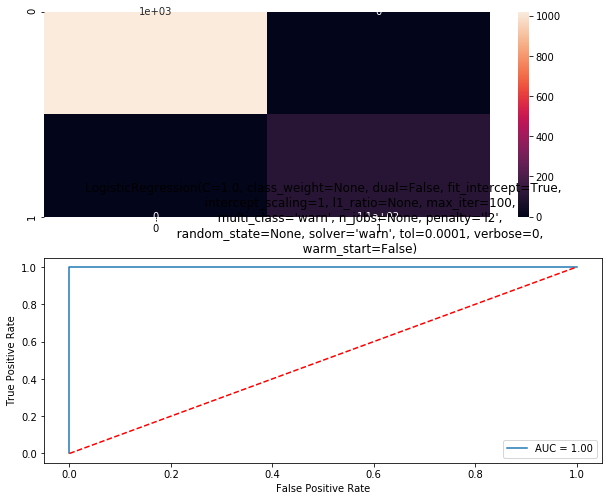

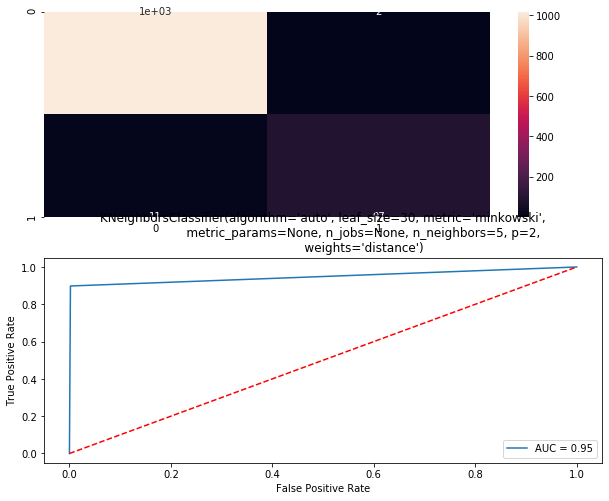

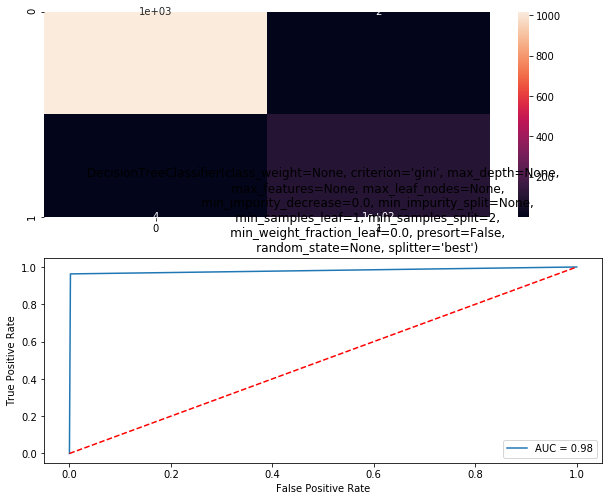

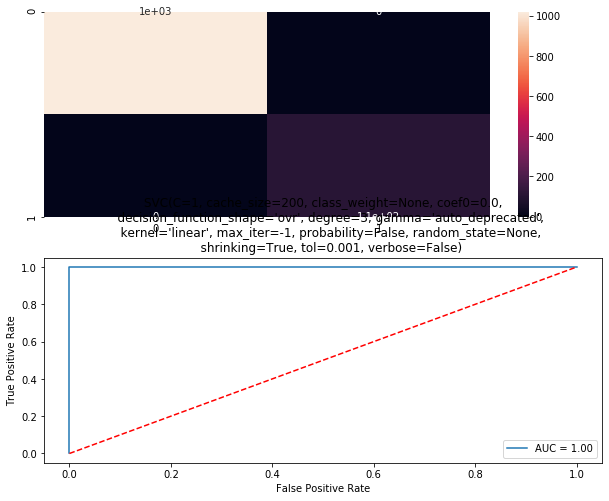

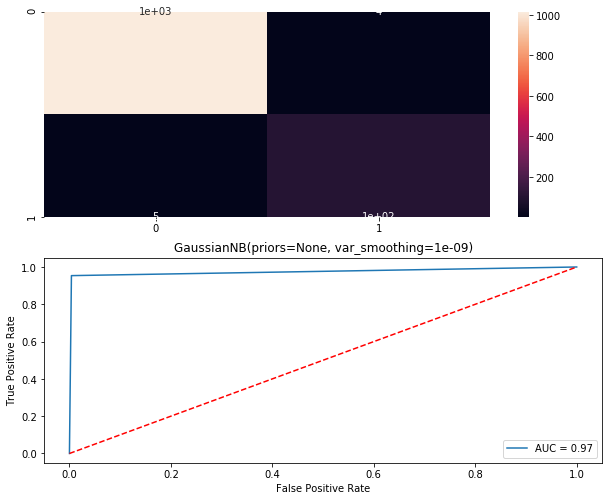

In [54]:
from sklearn.metrics import accuracy_score, auc, roc_auc_score, classification_report, confusion_matrix, roc_curve
from sklearn.naive_bayes import GaussianNB

score=[]
cv=[]
rocscore=[]


algorithms=[lg,KNeighborsClassifier(algorithm='auto', n_neighbors= 5, weights='distance'), DecisionTreeClassifier(criterion= 'gini', splitter= 'best'), SVC(C=1, kernel='linear'),GaussianNB()]

for i in algorithms:
    print(i)
    i.fit(train_x,train_y)
    pred=i.predict(test_x)
    accscore=accuracy_score(test_y,pred)
    score.append(accscore)
    print("The accuracy score is ", accscore)
    cvscore=cross_val_score(i,x,y,cv=5,scoring='accuracy').mean()
    cv.append(cvscore)
    print("The cross val score is", cvscore)
    print()
    print(classification_report(test_y,pred))
    print()
    cm=confusion_matrix(test_y,pred)
    print(cm)
    print()
    false_positive_rate,true_positive_rate,thresholds=roc_curve(test_y,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc)
    print("\n")
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(i)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print("\n")
    print("\n")

In [55]:
result=pd.DataFrame({'Model':[LogisticRegression,KNeighborsClassifier, DecisionTreeClassifier, SVC,GaussianNB()],'Accuracy_Score':score,'Cross_val_score':cv, 'AUC_ROC':rocscore})
result

,Model,Accuracy_Score,Cross_val_score,AUC_ROC
0,<class 'sklearn.linear_model.logistic.Logistic...,1.000000,1.000000,1.000000
1,<class 'sklearn.neighbors.classification.KNeig...,0.988485,0.991141,0.948095
2,<class 'sklearn.tree.tree.DecisionTreeClassifi...,0.994686,0.989544,0.980502
3,<class 'sklearn.svm.classes.SVC'>,1.000000,1.000000,1.000000
4,"GaussianNB(priors=None, var_smoothing=1e-09)",0.992028,0.948265,0.974893


In [94]:
# Let us finalise the Logistic regression
lg=LogisticRegression()
lg.fit(train_x,train_y)
pred=lg.predict(test_x)
acc_score=accuracy_score(pred,test_y)
print("The accuracy score is", acc_score)
cross_score=cross_val_score(lg,x,y,cv=5,scoring='accuracy').mean()
print("The cross validation score is ", cross_score)

The accuracy score is 1.0
The cross validation score is  1.0


In [95]:
#Saving the model
from sklearn.externals import joblib
joblib.dump(lg,"Project20_Covid prediction.pkl")

['Project20_Covid prediction.pkl']

#### Predicting the second target - whether the patient is admitted to the general ward

In [59]:
# checking the best random state
def max_acc_score(reg,x,y1):
    max_score=0
    for r_state in range (42,101):
        train_x1,test_x1,train_y1,test_y1=train_test_split(x,y1,random_state=r_state,test_size=0.20)
        reg.fit(train_x1,train_y1)
        pred=reg.predict(test_x1)
        acc_score=accuracy_score(test_y1,pred)
        if acc_score>max_score:
            max_score=acc_score
            final_r_state=r_state
    print("The maximum accuracy score", max_score, "is achieved at", final_r_state)
    return max_score

In [60]:
lg=LogisticRegression()
max_acc_score(lg,x,y1)

The maximum accuracy score 0.9911426040744021 is achieved at 59


0.9911426040744021

In [61]:
#Lets finalise the train and test data
train_x1,test_x1,train_y1,test_y1=train_test_split(x,y1,random_state=59,test_size=0.20)

In [62]:
#Let us check the different models and we need to use GradientSearchCV to bring out the best parameters for the models

#### Using GridSearchCV

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
parameters={'n_neighbors':(5,10,15,20),'weights':('uniform','distance'),'algorithm':('auto','ball_tree','kd_tree','brute')}
gdkn=GridSearchCV(kn,parameters)
gdkn.fit(train_x1,train_y1)
gdkn.best_params_

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}

In [64]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy'), 'splitter':('best','random')}
gddt=GridSearchCV(dt,parameters)
gddt.fit(train_x1,train_y1)
gddt.best_params_

{'criterion': 'entropy', 'splitter': 'best'}

In [65]:
from sklearn.svm import SVC
sv=SVC()
parameters={'C':(1,10),'kernel':('linear','poly','rbf')}
gdsv=GridSearchCV(sv,parameters)
gdsv.fit(train_x1,train_y1)
gdsv.best_params_

{'C': 1, 'kernel': 'rbf'}

In [ ]:
#After obtaining best parameters, we should now check the models

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
The accuracy score is  0.9911426040744021
The cross val score is 0.9844065858821903

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1121
           1       0.33      0.25      0.29         8

    accuracy                           0.99      1129
   macro avg       0.66      0.62      0.64      1129
weighted avg       0.99      0.99      0.99      1129


[[1117    4]
 [   6    2]]

roc_auc_score 0.6232158786797501


AxesSubplot(0.125,0.808774;0.62x0.0712264)




KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
     

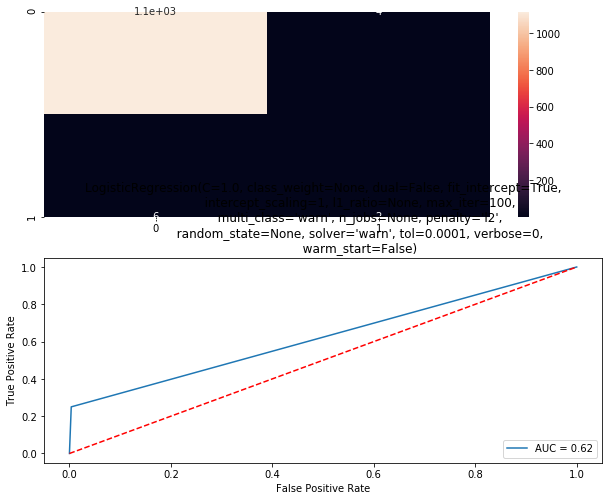

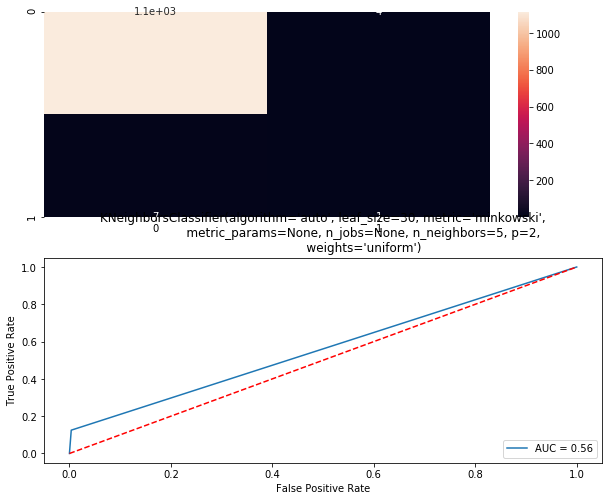

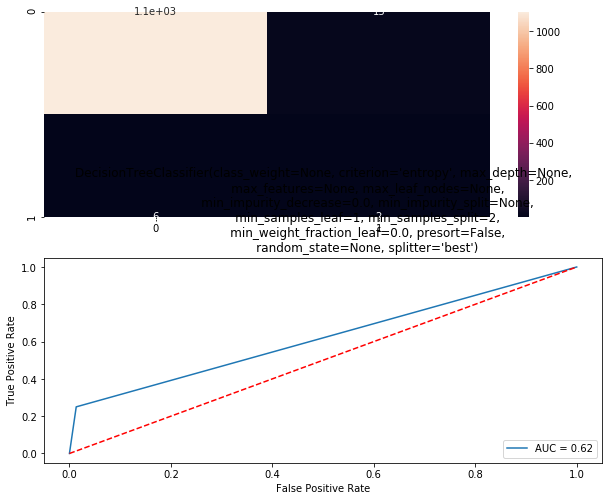

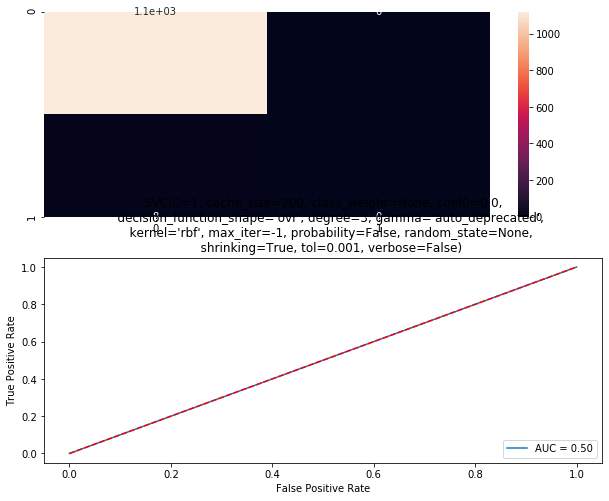

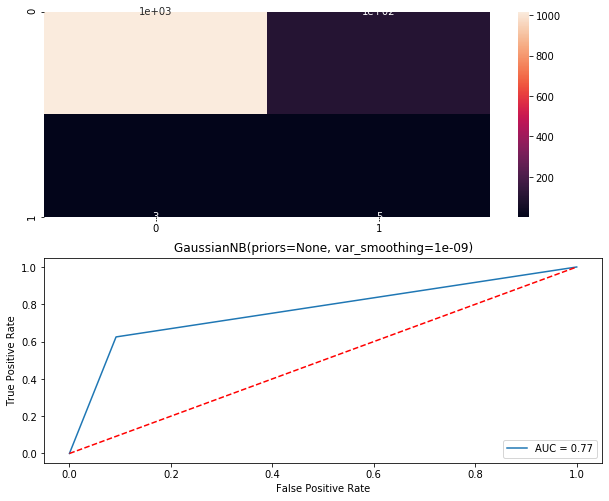

In [66]:
from sklearn.metrics import accuracy_score, auc, roc_auc_score, classification_report, confusion_matrix, roc_curve
from sklearn.naive_bayes import GaussianNB

score=[]
cv=[]
rocscore=[]


algorithms=[lg,KNeighborsClassifier(algorithm='auto', n_neighbors= 5, weights='uniform'), DecisionTreeClassifier(criterion= 'entropy', splitter= 'best'), SVC(C=1, kernel='rbf'),GaussianNB()]

for i in algorithms:
    print(i)
    i.fit(train_x1,train_y1)
    pred=i.predict(test_x1)
    accscore=accuracy_score(test_y1,pred)
    score.append(accscore)
    print("The accuracy score is ", accscore)
    cvscore=cross_val_score(i,x,y1,cv=5,scoring='accuracy').mean()
    cv.append(cvscore)
    print("The cross val score is", cvscore)
    print()
    print(classification_report(test_y1,pred))
    print()
    cm=confusion_matrix(test_y1,pred)
    print(cm)
    print()
    false_positive_rate,true_positive_rate,thresholds=roc_curve(test_y1,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc)
    print("\n")
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(i)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print("\n")
    print("\n")

In [67]:
result=pd.DataFrame({'Model':[LogisticRegression,KNeighborsClassifier, DecisionTreeClassifier, SVC,GaussianNB()],'Accuracy_Score':score,'Cross_val_score':cv, 'AUC_ROC':rocscore})
result

,Model,Accuracy_Score,Cross_val_score,AUC_ROC
0,<class 'sklearn.linear_model.logistic.Logistic...,0.991143,0.984407,0.623216
1,<class 'sklearn.neighbors.classification.KNeig...,0.990257,0.984408,0.560716
2,<class 'sklearn.tree.tree.DecisionTreeClassifi...,0.981399,0.973774,0.618310
3,<class 'sklearn.svm.classes.SVC'>,0.992914,0.986003,0.500000
4,"GaussianNB(priors=None, var_smoothing=1e-09)",0.906112,0.909989,0.766559


In [68]:
# Let us finalise the GaussianNB as it is giving better AUC ROC scores along with good accuracy and cross val scores as well
gb=GaussianNB()
gb.fit(train_x1,train_y1)
pred=gb.predict(test_x1)
acc_score=accuracy_score(pred,test_y1)
print("The accuracy score is", acc_score)
cross_score=cross_val_score(gb,x,y1,cv=5,scoring='accuracy').mean()
print("The cross validation score is ", cross_score)

The accuracy score is 0.9061116031886626
The cross validation score is  0.9099890695965174


In [69]:
#Saving the model

joblib.dump(gb,"Project20_General ward prediction.pkl")

['Project20_General ward prediction.pkl']

#### Predicting the third target - whether the patient is admitted to the semi intensive unit care

In [70]:
# Lets check the best random_state
def max_acc_score(lr,x,y):
    max_score=0
    for r_state in range(42,101):
        train_x2,test_x2,train_y2,test_y2=train_test_split(x,y2,random_state=r_state,test_size=0.20)
        lr.fit(train_x2,train_y2)
        pred=lr.predict(test_x2)
        acc_score=accuracy_score(pred,test_y2)
        if acc_score>max_score:
            max_score=acc_score
            final_r_state=r_state
            
    print("The random state at which the highest accuracy score", max_score, "is achieved at", final_r_state)

In [71]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

max_acc_score(lg,x,y2)

The random state at which the highest accuracy score 0.995571302037201 is achieved at 54


In [72]:
#Lets finalise the train and test data
train_x2,test_x2,train_y2,test_y2=train_test_split(x,y2,random_state=54,test_size=0.20)

In [73]:
#Let us check the different models and we need to use GradientSearchCV to bring out the best parameters for the models

#### Using GridSearchCV

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
parameters={'n_neighbors':(5,10,15,20),'weights':('uniform','distance'),'algorithm':('auto','ball_tree','kd_tree','brute')}
gdkn=GridSearchCV(kn,parameters)
gdkn.fit(train_x2,train_y2)
gdkn.best_params_

{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'uniform'}

In [75]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy'), 'splitter':('best','random')}
gddt=GridSearchCV(dt,parameters)
gddt.fit(train_x2,train_y2)
gddt.best_params_

{'criterion': 'entropy', 'splitter': 'best'}

In [76]:
from sklearn.svm import SVC
sv=SVC()
parameters={'C':(1,10),'kernel':('linear','poly','rbf')}
gdsv=GridSearchCV(sv,parameters)
gdsv.fit(train_x2,train_y2)
gdsv.best_params_

{'C': 1, 'kernel': 'rbf'}

In [77]:
# we need to check which model is working best

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
The accuracy score is  0.995571302037201
The cross val score is 0.9870633335217885

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1126
           1       0.00      0.00      0.00         3

    accuracy                           1.00      1129
   macro avg       0.50      0.50      0.50      1129
weighted avg       0.99      1.00      1.00      1129


[[1124    2]
 [   3    0]]

roc_auc_score 0.4991119005328597


AxesSubplot(0.125,0.808774;0.62x0.0712264)




KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
     

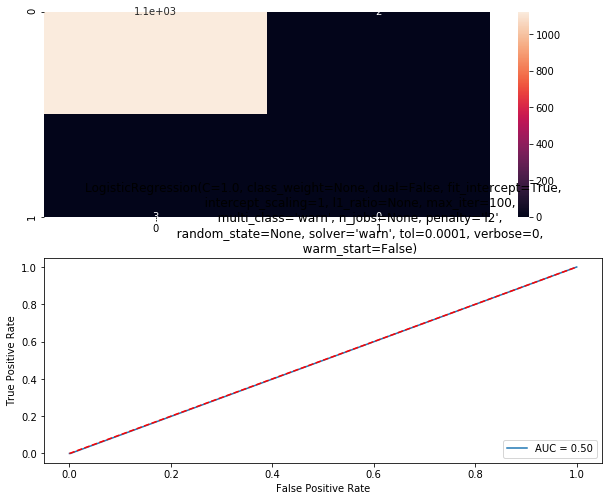

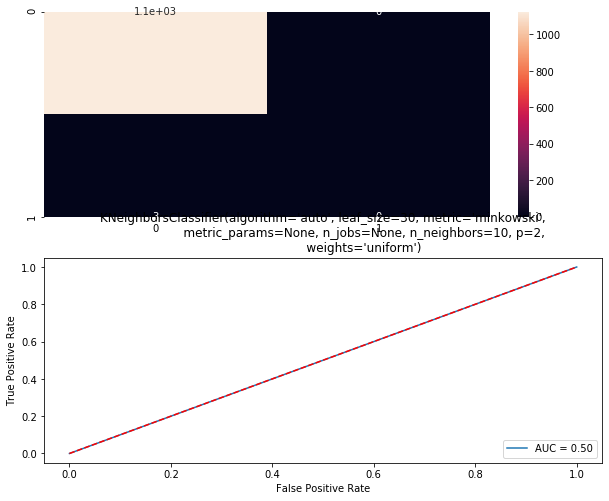

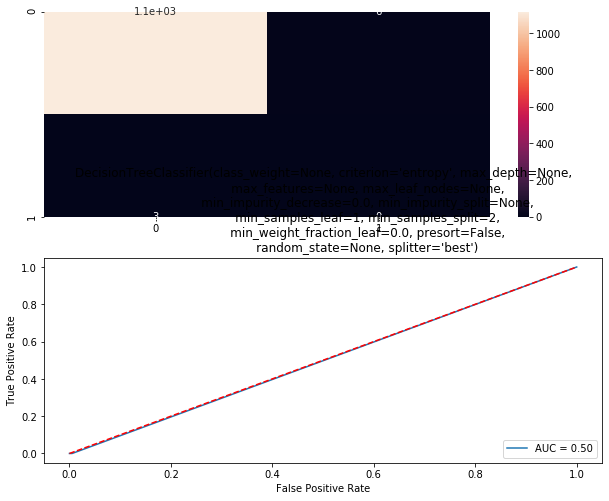

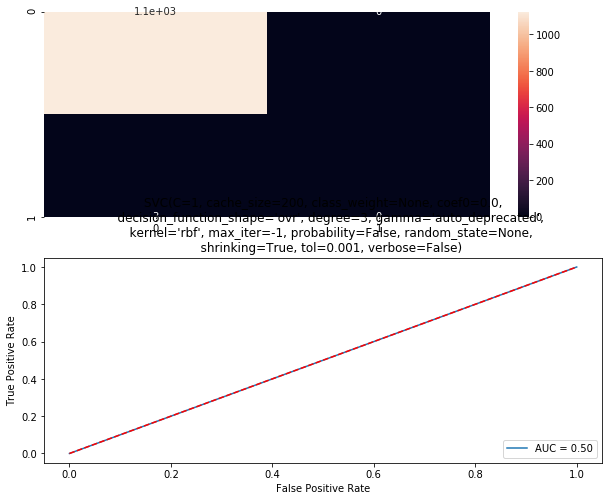

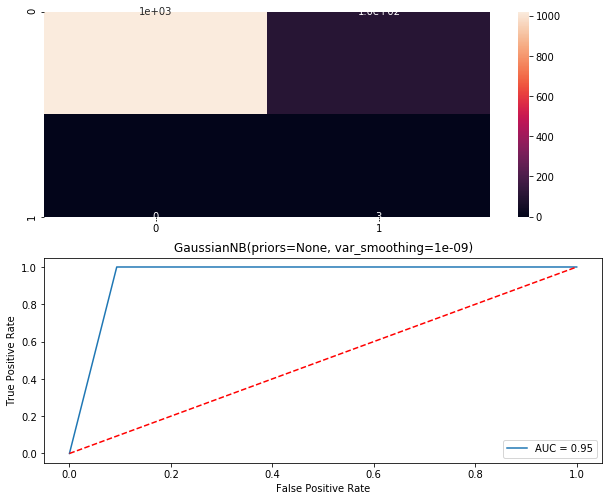

In [78]:
from sklearn.metrics import accuracy_score, auc, roc_auc_score, classification_report, confusion_matrix, roc_curve
from sklearn.naive_bayes import GaussianNB

score=[]
cv=[]
rocscore=[]


algorithms=[lg,KNeighborsClassifier(algorithm='auto', n_neighbors= 10, weights='uniform'), DecisionTreeClassifier(criterion= 'entropy', splitter= 'best'), SVC(C=1, kernel='rbf'),GaussianNB()]

for i in algorithms:
    print(i)
    i.fit(train_x2,train_y2)
    pred=i.predict(test_x2)
    accscore=accuracy_score(test_y2,pred)
    score.append(accscore)
    print("The accuracy score is ", accscore)
    cvscore=cross_val_score(i,x,y2,cv=5,scoring='accuracy').mean()
    cv.append(cvscore)
    print("The cross val score is", cvscore)
    print()
    print(classification_report(test_y2,pred))
    print()
    cm=confusion_matrix(test_y2,pred)
    print(cm)
    print()
    false_positive_rate,true_positive_rate,thresholds=roc_curve(test_y2,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc)
    print("\n")
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(i)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print("\n")
    print("\n")

In [79]:
result=pd.DataFrame({'Model':[LogisticRegression,KNeighborsClassifier, DecisionTreeClassifier, SVC,GaussianNB()],'Accuracy_Score':score,'Cross_val_score':cv, 'AUC_ROC':rocscore})
result

,Model,Accuracy_Score,Cross_val_score,AUC_ROC
0,<class 'sklearn.linear_model.logistic.Logistic...,0.995571,0.987063,0.499112
1,<class 'sklearn.neighbors.classification.KNeig...,0.997343,0.991141,0.500000
2,<class 'sklearn.tree.tree.DecisionTreeClassifi...,0.992028,0.984051,0.497336
3,<class 'sklearn.svm.classes.SVC'>,0.997343,0.991141,0.500000
4,"GaussianNB(priors=None, var_smoothing=1e-09)",0.906997,0.916542,0.953375


In [80]:
# Let us finalise the GaussianNB as it is giving better AUC ROC scores as well along with good accuracy score and cross val score
gb=GaussianNB()
gb.fit(train_x2,train_y2)
pred=gb.predict(test_x2)
acc_score=accuracy_score(pred,test_y2)
print("The accuracy score is", acc_score)
cross_score=cross_val_score(gb,x,y2,cv=5,scoring='accuracy').mean()
print("The cross validation score is ", cross_score)

The accuracy score is 0.9069973427812223
The cross validation score is  0.9165424432592705


In [81]:
# Saving the model
joblib.dump(gb,"Project20_Semi intensive ward prediction.pkl")

['Project20_Semi intensive ward prediction.pkl']

#### Predicting the fourth target - whether the patient is admitted to the intensive unit care

In [82]:
# determining the best random state
def max_acc_score(lr,x,y):
    max_score=0
    for r_state in range(42,101):
        train_x3,test_x3,train_y3,test_y3=train_test_split(x,y3,random_state=r_state,test_size=0.20)
        lr.fit(train_x3,train_y3)
        pred=lr.predict(test_x3)
        acc_score=accuracy_score(pred,test_y3)
        if acc_score>max_score:
            max_score=acc_score
            final_r_state=r_state
            
    print("The random state at which the highest accuracy score", max_score, "is achieved at", final_r_state)

In [83]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

max_acc_score(lg,x,y3)

The random state at which the highest accuracy score 0.9964570416297609 is achieved at 99


In [84]:
#Lets finalise the train and test data
train_x3,test_x3,train_y3,test_y3=train_test_split(x,y3,random_state=99,test_size=0.20)

In [85]:
#Let us check the different models and we need to use GradientSearchCV to bring out the best parameters for the models

#### Using GridSearchCV

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
parameters={'n_neighbors':(5,10,15,20),'weights':('uniform','distance'),'algorithm':('auto','ball_tree','kd_tree','brute')}
gdkn=GridSearchCV(kn,parameters)
gdkn.fit(train_x3,train_y3)
gdkn.best_params_

{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'uniform'}

In [87]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy'), 'splitter':('best','random')}
gddt=GridSearchCV(dt,parameters)
gddt.fit(train_x3,train_y3)
gddt.best_params_

{'criterion': 'entropy', 'splitter': 'random'}

In [88]:
from sklearn.svm import SVC
sv=SVC()
parameters={'C':(1,10),'kernel':('linear','poly','rbf')}
gdsv=GridSearchCV(sv,parameters)
gdsv.fit(train_x3,train_y3)
gdsv.best_params_

{'C': 1, 'kernel': 'linear'}

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
The accuracy score is  0.9964570416297609
The cross val score is 0.9907857927213698

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1125
           1       0.50      0.25      0.33         4

    accuracy                           1.00      1129
   macro avg       0.75      0.62      0.67      1129
weighted avg       1.00      1.00      1.00      1129


[[1124    1]
 [   3    1]]

roc_auc_score 0.6245555555555554


AxesSubplot(0.125,0.808774;0.62x0.0712264)




KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
    

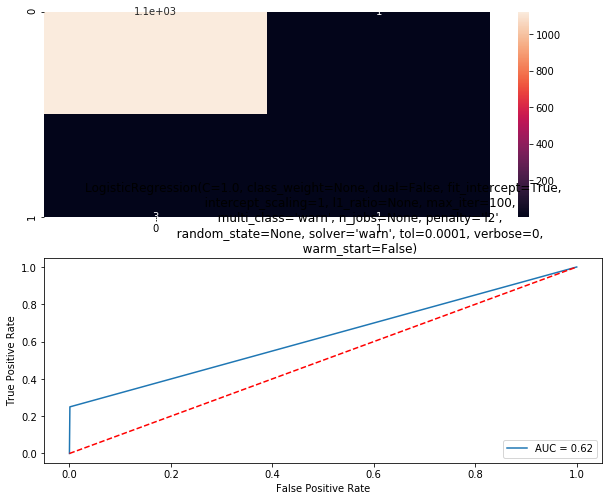

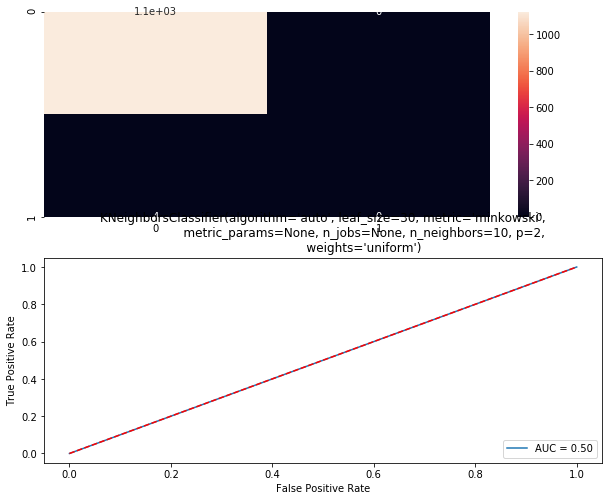

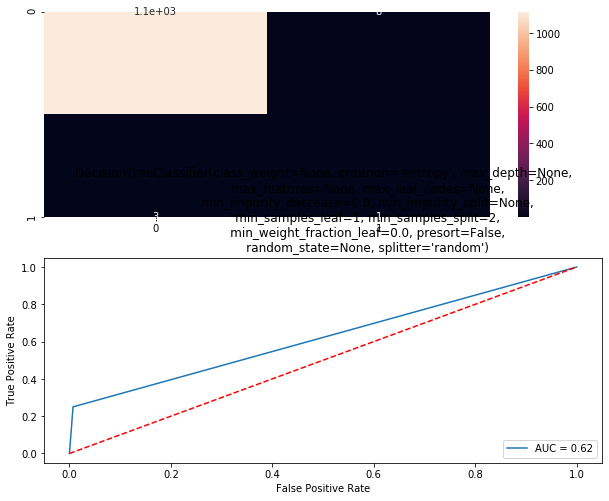

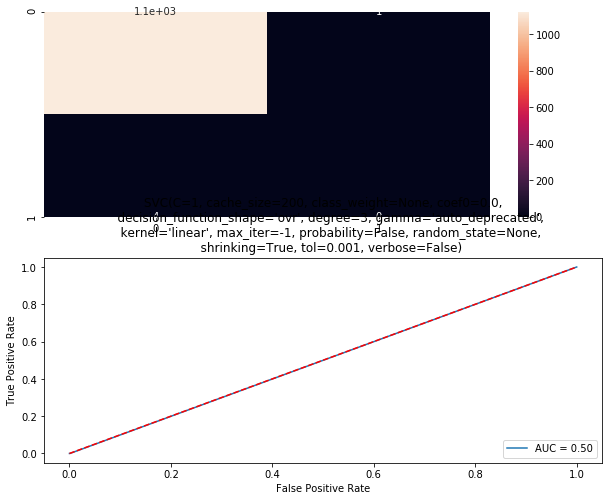

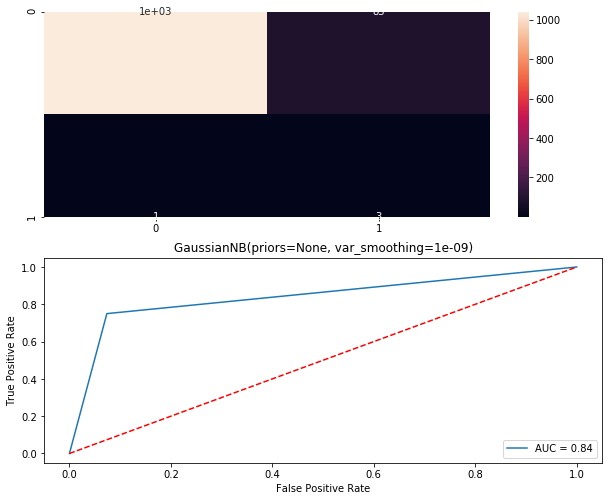

In [89]:
# Lets check the best models
from sklearn.metrics import accuracy_score, auc, roc_auc_score, classification_report, confusion_matrix, roc_curve
from sklearn.naive_bayes import GaussianNB

score=[]
cv=[]
rocscore=[]


algorithms=[lg,KNeighborsClassifier(algorithm='auto', n_neighbors= 10, weights='uniform'), DecisionTreeClassifier(criterion= 'entropy', splitter= 'random'), SVC(C=1, kernel='linear'),GaussianNB()]

for i in algorithms:
    print(i)
    i.fit(train_x3,train_y3)
    pred=i.predict(test_x3)
    accscore=accuracy_score(test_y3,pred)
    score.append(accscore)
    print("The accuracy score is ", accscore)
    cvscore=cross_val_score(i,x,y3,cv=5,scoring='accuracy').mean()
    cv.append(cvscore)
    print("The cross val score is", cvscore)
    print()
    print(classification_report(test_y3,pred))
    print()
    cm=confusion_matrix(test_y3,pred)
    print(cm)
    print()
    false_positive_rate,true_positive_rate,thresholds=roc_curve(test_y3,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc)
    print("\n")
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(i)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print("\n")
    print("\n")

In [90]:
result=pd.DataFrame({'Model':[LogisticRegression,KNeighborsClassifier, DecisionTreeClassifier, SVC,GaussianNB()],'Accuracy_Score':score,'Cross_val_score':cv, 'AUC_ROC':rocscore})
result

,Model,Accuracy_Score,Cross_val_score,AUC_ROC
0,<class 'sklearn.linear_model.logistic.Logistic...,0.996457,0.990786,0.624556
1,<class 'sklearn.neighbors.classification.KNeig...,0.996457,0.992736,0.500000
2,<class 'sklearn.tree.tree.DecisionTreeClassifi...,0.990257,0.986001,0.621444
3,<class 'sklearn.svm.classes.SVC'>,0.995571,0.990963,0.499556
4,"GaussianNB(priors=None, var_smoothing=1e-09)",0.925598,0.915844,0.838111


In [91]:
# Let us finalise the GaussianNB as it is giving better AUC ROC scores as well
gb=GaussianNB()
gb.fit(train_x3,train_y3)
pred=gb.predict(test_x3)
acc_score=accuracy_score(pred,test_y3)
print("The accuracy score is", acc_score)
cross_score=cross_val_score(gb,x,y3,cv=5,scoring='accuracy').mean()
print("The cross validation score is ", cross_score)

The accuracy score is 0.9255978742249779
The cross validation score is  0.9158437082386124


In [93]:
# Saving the model
joblib.dump(gb,"Project20_intensive ward prediction.pkl")

['Project20_intensive ward prediction.pkl']